In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/udemy_time_series/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/udemy_time_series/test.csv")

In [22]:
y_train = train_df["y"]
X_train = train_df.drop(columns=["date_y", "y"])

y_test = test_df["y"]
X_test = test_df.drop(columns=["date_y", "y"])

In [23]:
import lightgbm as lgb

In [24]:
model = lgb.LGBMRegressor(objective="regression")
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'regression',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [25]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [29]:
num_leaves = [3,5]
learning_rates = [0.1, 0.001]
num_leaves = [3,5,7]
learning_rates = [0.1, 0.01, 0.001]
n_estimators = [10, 30, 100]
reg_alphas = [2, 5, 10]
reg_lambdas = [10, 20, 30]

split_num = 3

In [30]:
tscv = TimeSeriesSplit(n_splits=split_num)
rmse_cv = []
param = []
param_df = pd.DataFrame([])

In [31]:
for num_leave in num_leaves:
  for learning_rate in learning_rates:
    for n_estimator in n_estimators:
      for reg_alpha in reg_alphas:
        for reg_lambda in reg_lambdas:
          rmse_cv = []
          for train, test in tscv.split(train_df):
            x_train = train_df.iloc[train]
            x_test = train_df.iloc[test]

            y_train = x_train["y"]
            x_train = x_train.drop(columns=["date_y", "y"])
            y_test = x_test["y"]
            x_test = x_test.drop(columns=["date_y", "y"])

            # 以下、動画のコードを修正済み（結果に変化なし）
            # for i in range(split_num):
            lgb_model = lgb.LGBMRegressor(
                objective = "regression"
                , num_leaves = num_leave
                , learning_rates = learning_rate
                , n_estimators = n_estimator
                , reg_alpha = reg_alpha
                , reg_lambda = reg_lambda
            )
            lgb_model.fit(x_train, y_train)

            lgb_pred = lgb_model.predict(x_test)
            rmse_cv.append(np.sqrt(mean_squared_error(y_test.values, lgb_pred)))
            #本行までインデントを1段階下げている（動画のコードからの変化）
            
          param.append([num_leave, learning_rate, n_estimator, reg_alpha, reg_lambda, np.mean(rmse_cv)])
          param_df = param_df.append(param, ignore_index=True)
          param = []

param_df.columns = ["num_leave", "learning_rate", "n_estimator", "reg_alpha", "reg_lambda", "rmse"]
param_df

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM]

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM]

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM]

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM]

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM]

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM]

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM]

<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be rem

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)
<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates


<ipython-input-31-ad0933ab371e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(param, ignore_index=True)


,num_leave,learning_rate,n_estimator,reg_alpha,reg_lambda,rmse
0,3,0.100,10,2,10,74.495317
1,3,0.100,10,2,20,74.559757
2,3,0.100,10,2,30,74.586660
3,3,0.100,10,5,10,74.564095
4,3,0.100,10,5,20,74.576328
...,...,...,...,...,...,...
238,7,0.001,100,5,20,73.537687
239,7,0.001,100,5,30,73.540384
240,7,0.001,100,10,10,73.545316
241,7,0.001,100,10,20,73.549278


In [14]:
param_df.loc[param_df["rmse"].idxmin()]

num_leave         5.000000
learning_rate     0.001000
n_estimator      30.000000
reg_alpha        10.000000
reg_lambda       30.000000
rmse             73.419307
Name: 152, dtype: float64

In [15]:
y_train = train_df["y"]
x_train = train_df.drop(columns=["date_y", "y"])

y_test = test_df["y"]
x_test = test_df.drop(columns=["date_y", "y"])

lgb_model = lgb.LGBMRegressor(
    objective="regression"
    , num_leaves = 5
    , learning_rates = 0.001
    , n_estimators = 30
    , reg_alpha = 10
    , reg_lambda = 30
)

lgb_model.fit(x_train, y_train)


[LightGBM] [Warning] Unknown parameter: learning_rates


LGBMRegressor(learning_rates=0.001, n_estimators=30, num_leaves=5,
              objective='regression', reg_alpha=10, reg_lambda=30)

<Axes: >

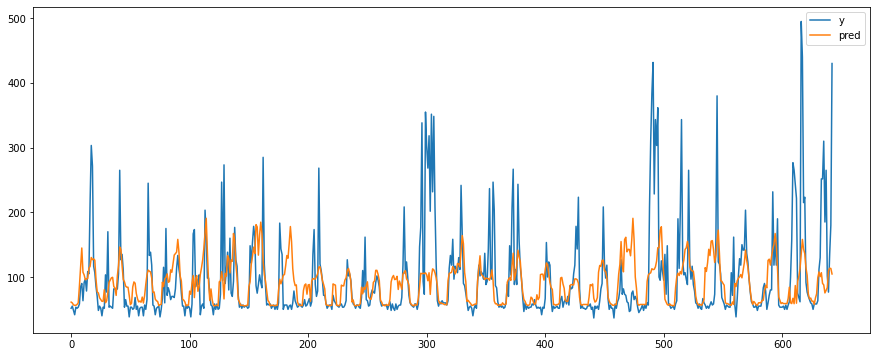

In [16]:
lgb_pred = lgb_model.predict(x_test)
result_df = pd.DataFrame(data=pd.concat([y_test, pd.Series(lgb_pred)], axis=1))
result_df.columns= ["y", "pred"]
result_df.plot(figsize=(15, 6))

In [17]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(result_df["y"], result_df["pred"]))
print("RMSE:{:.2f}".format(rmse))

RMSE:62.46
